<ipython-input-2-b3bfbec13d56>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='ffill', inplace = True)
<ipython-input-2-b3bfbec13d56>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


Regression Score: 0.3793372083291967
       Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0            1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1            1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2            1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3            1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4            1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   
...        ...      ...          ...                                     ...   
23349      759    23350  092.0 098.0  19-4910CR-HY-287-1854-09200980-0286A-3   
23350      759    23351  092.0 098.0  19-4910CR-HY-287-1854-09200980-0300A-7   
23351      759    23352  092.0 098.0  19-4910CR-HY-287-1854-09200980-0381A-3   
23352      759    23353  092.0 098.0  19-4910CR-HY-287-1854-09200980-0400A-7   
23353      759    23354  092.0 098.0                                     19-   

  

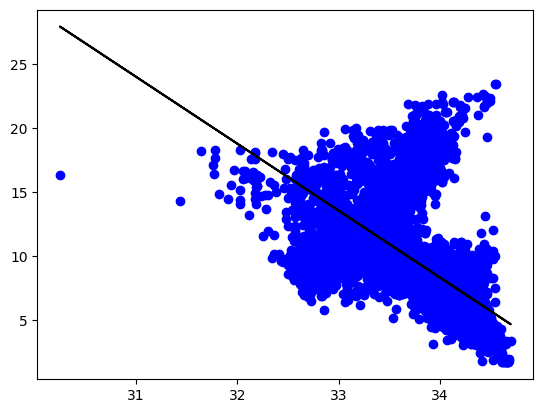

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('bottle.csv')
df_binary = df[['Salnty', 'T_degC']]

df_binary.columns = ['Sal', 'Temp']

df_binary.head()

df_binary.fillna(method ='ffill', inplace = True)

X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)

df_binary.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)
print("Regression Score:",regr.score(X_test, y_test))
print(df)

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()